In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Dataset

In [2]:
df_3m = pd.read_csv('datasets/btc_3m.csv')
df_3m

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13666.11,13680.00,6.303815
1,2018-01-01 05:33:00,13679.98,13679.98,13554.44,13568.00,33.709206
2,2018-01-01 05:36:00,13568.00,13575.00,13501.01,13575.00,29.645987
3,2018-01-01 05:39:00,13539.99,13575.00,13400.01,13515.26,30.696039
4,2018-01-01 05:42:00,13515.26,13568.66,13473.47,13556.15,23.260966
...,...,...,...,...,...,...
713012,2022-01-31 05:18:00,37919.05,37919.05,37876.94,37891.30,30.717900
713013,2022-01-31 05:21:00,37891.30,37946.56,37870.00,37918.80,28.369420
713014,2022-01-31 05:24:00,37918.79,37948.79,37888.88,37898.01,22.346010
713015,2022-01-31 05:27:00,37898.02,37945.25,37870.00,37881.76,42.838730


In [3]:
# Getting a shorter training set of 3 months

# Set the date range
start_date = '2018-01-01 05:30:00'
end_date = '2018-04-01 05:30:00'

# Filter the data
filtered_df_3m = df_3m[(df_3m['datetime'] >= start_date) & (df_3m['datetime'] <= end_date)]
print(filtered_df_3m.shape)
filtered_df_3m.tail()

(42475, 6)


,datetime,open,high,low,close,volume
42470,2018-04-01 05:18:00,6918.86,6920.0,6909.26,6920.00,15.129632
42471,2018-04-01 05:21:00,6920.00,6930.0,6920.00,6929.77,23.790508
42472,2018-04-01 05:24:00,6929.78,6930.0,6922.00,6927.99,11.032854
42473,2018-04-01 05:27:00,6928.00,6928.0,6922.00,6923.91,17.507267
42474,2018-04-01 05:30:00,6922.00,6996.0,6922.00,6996.00,105.952631


In [4]:
# Calculating RSI

# Calculate daily price changes
filtered_df_3m['delta'] = df_3m['close'].diff()

# Define the window for calculating average gain and average loss
n = 14  # You may adjust this based on your preferences

# Calculate gains (positive changes) and losses (negative changes)
gains = filtered_df_3m['delta'].apply(lambda x: x if x > 0 else 0)
losses = -filtered_df_3m['delta'].apply(lambda x: x if x < 0 else 0)

# Calculate average gains and average losses over the specified window
avg_gain = gains.rolling(window=n, min_periods=1).mean()
avg_loss = losses.rolling(window=n, min_periods=1).mean()

# Calculate relative strength (RS)
rs = avg_gain / avg_loss

# Calculate RSI
filtered_df_3m['rsi'] = 100 - (100 / (1 + rs))

# Drop the 'delta' column as it was used for intermediate calculations
filtered_df_3m = filtered_df_3m.drop('delta', axis=1)

# Adding change in close price
filtered_df_3m['close_Change'] = filtered_df_3m['close'].shift(-1) - filtered_df_3m['close']

# Drop rows with NaN values created by shifting
filtered_df_3m.dropna(inplace=True)

# Define the time window size
time_window = 14  # You can adjust this based on your preference

# Create time windows
for i in range(1, time_window + 1):
    for col in ['open', 'high', 'low', 'close', 'volume', 'rsi', 'close_Change']:
        filtered_df_3m[f'{col}_lag_{i}'] = filtered_df_3m[col].shift(i)

# Drop rows with NaN values introduced by the lag
filtered_df_3m.dropna(inplace=True)

# Display the DataFrame
print(filtered_df_3m.shape)
filtered_df_3m.head()

(42459, 106)


C:\Users\sanya\AppData\Local\Temp\ipykernel_13136\484218328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_3m['delta'] = df_3m['close'].diff()
C:\Users\sanya\AppData\Local\Temp\ipykernel_13136\484218328.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_3m['rsi'] = 100 - (100 / (1 + rs))
C:\Users\sanya\AppData\Local\Temp\ipykernel_13136\484218328.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

,datetime,open,high,low,close,volume,rsi,close_Change,open_lag_1,high_lag_1,...,volume_lag_13,rsi_lag_13,close_Change_lag_13,open_lag_14,high_lag_14,low_lag_14,close_lag_14,volume_lag_14,rsi_lag_14,close_Change_lag_14
15,2018-01-01 06:15:00,13494.65,13550.87,13450.00,13550.87,34.692928,48.182571,-15.87,13498.62,13498.62,...,29.645987,5.882353,-59.74,13679.98,13679.98,13554.44,13568.00,33.709206,0.000000,7.00
16,2018-01-01 06:18:00,13545.30,13690.87,13521.34,13535.00,30.523376,45.834548,13.20,13494.65,13550.87,...,30.696039,3.916303,40.89,13568.00,13575.00,13501.01,13575.00,29.645987,5.882353,-59.74
17,2018-01-01 06:21:00,13574.85,13603.76,13531.99,13548.20,23.848086,53.798432,-38.20,13545.30,13690.87,...,23.260966,21.804854,-116.12,13539.99,13575.00,13400.01,13515.26,30.696039,3.916303,40.89
18,2018-01-01 06:24:00,13548.20,13584.65,13499.98,13510.00,21.704467,44.645053,19.01,13574.85,13603.76,...,19.607189,14.263589,-0.02,13515.26,13568.66,13473.47,13556.15,23.260966,21.804854,-116.12
19,2018-01-01 06:27:00,13528.98,13574.05,13452.56,13529.01,30.930862,63.328340,1.97,13548.20,13584.65,...,20.950831,14.262739,0.00,13533.75,13547.73,13402.00,13440.03,19.607189,14.263589,-0.02


### Input and output features

In [5]:
split_ratio = 0.8
split_index = int(split_ratio * len(filtered_df_3m))

train_data = filtered_df_3m[:split_index]
test_data = filtered_df_3m[split_index:]

In [6]:
# Prepare the input features and target variable
dates_train = train_data['datetime']
X_train = train_data.drop(['datetime','close_Change'], axis=1).values
y_train = train_data['close_Change'].values

X_test = test_data.drop(['datetime','close_Change'], axis=1).values
y_test = test_data['close_Change'].values

# Reshape input features for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


## Model

In [7]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.activations import leaky_relu
from keras.layers import Dense, LSTM, Dropout

In [8]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dense(1))

model.compile(loss='mean_absolute_percentage_error',
              optimizer=Adam(),
              metrics=['mean_absolute_percentage_error','mean_squared_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             43264     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2

In [9]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
850/850 [==============================] - 13s 9ms/step - loss: 73004.7812 - mean_absolute_percentage_error: 73004.7812 - mean_squared_error: 2363.4084 - val_loss: 67318.2891 - val_mean_absolute_percentage_error: 67318.2891 - val_mean_squared_error: 699.2213
Epoch 2/100
850/850 [==============================] - 7s 8ms/step - loss: 37563.9922 - mean_absolute_percentage_error: 37563.9922 - mean_squared_error: 2363.4126 - val_loss: 80654.5703 - val_mean_absolute_percentage_error: 80654.5703 - val_mean_squared_error: 699.2305
Epoch 3/100
850/850 [==============================] - 7s 8ms/step - loss: 21050.7637 - mean_absolute_percentage_error: 21050.7637 - mean_squared_error: 2363.4143 - val_loss: 48169.8359 - val_mean_absolute_percentage_error: 48169.8359 - val_mean_squared_error: 699.2285
Epoch 4/100
850/850 [==============================] - 7s 8ms/step - loss: 16715.7500 - mean_absolute_percentage_error: 16715.7500 - mean_squared_error: 2363.4194 - val_loss: 18189.7812 - v

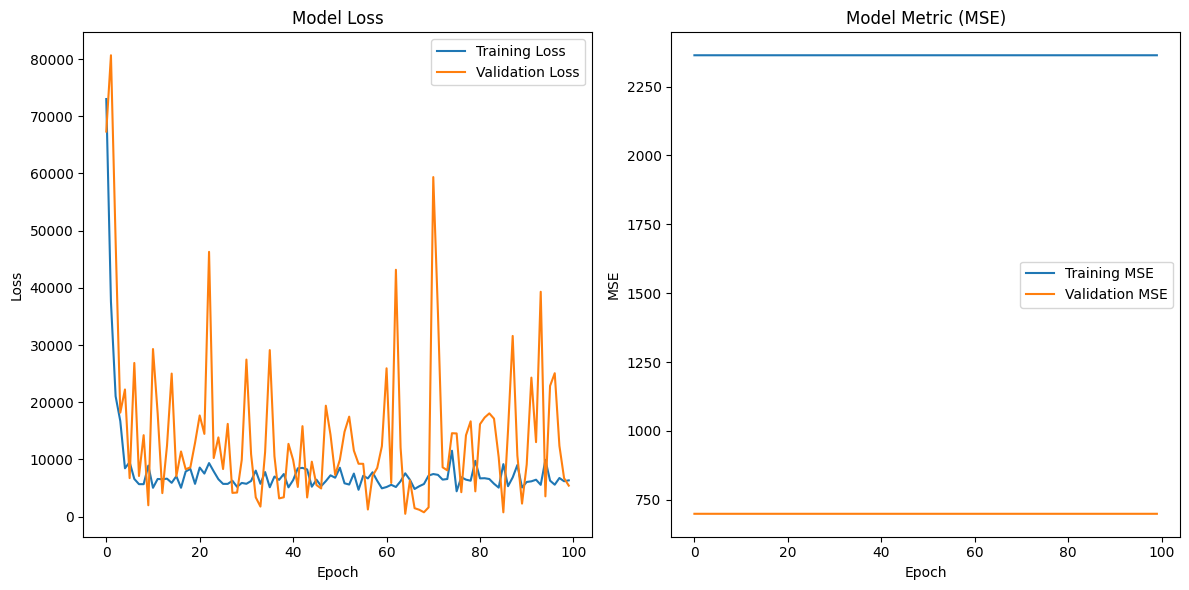

In [10]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation metrics (e.g., Mean Squared Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Metric (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
model.save(f"BTC_LSTM_{datetime.datetime.timestamp(datetime.datetime.now())}.h5")

In [13]:
from keras.models import load_model
model = load_model('BTC_LSTM.h5')

In [14]:
train_predictions = model.predict(X_train).flatten()
train_predictions

1062/1062 [==============================] - 3s 2ms/step


array([0.00318407, 0.00318407, 0.00318407, ..., 0.00318407, 0.00318407,
       0.00318407], dtype=float32)

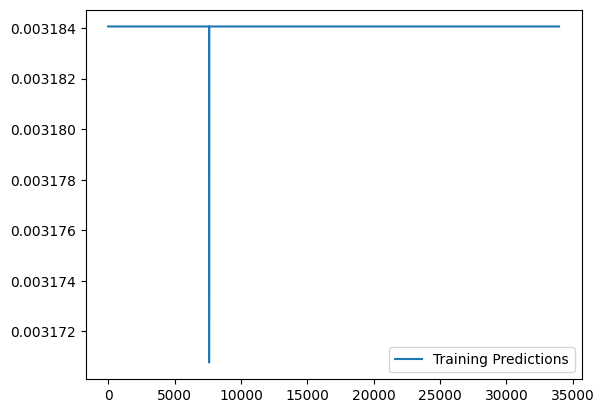

In [20]:
plt.plot( train_predictions)
plt.legend(['Training Predictions'])

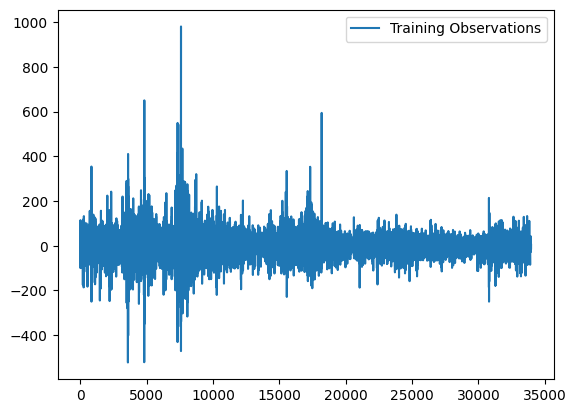

In [21]:
plt.plot( y_train)
plt.legend(['Training Observations'])

266/266 [==============================] - 1s 3ms/step


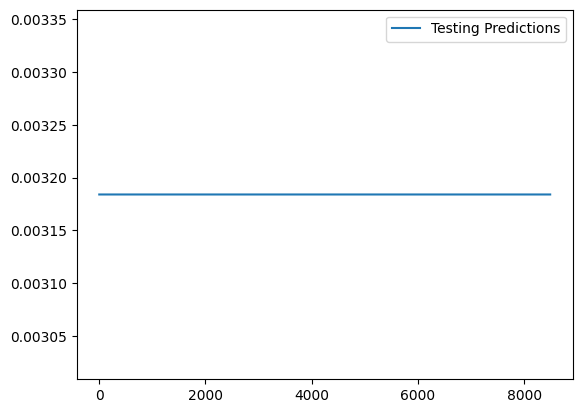

In [22]:
test_predictions = model.predict(X_test).flatten()

plt.plot(test_predictions)
plt.legend(['Testing Predictions'])

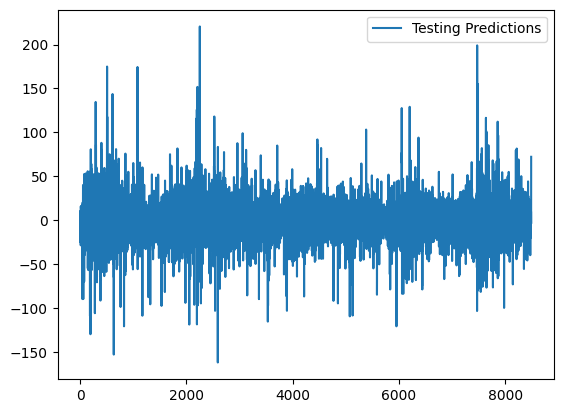

In [23]:
plt.plot(y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

## Trade simulation

In [ ]:
balance_usdt = 10000
balance_btc = 0
stop_loss = balance_btc*(0.002)

for i in range(df.shape[0]):
    
    # get the date for the i th row
    date = df.iloc[i]['datetime']

    # Get the data for the date
    data = df[df['datetime'] == date]

    # Get the feature vector for the date
    x = data[features]

    # Predict the price using the model
    y_pred = model_3m.predict(x)

    # difference between the predicted close and actual open
    open=data["open"].values[0]
    close_predicted=y_pred[0]
    diff = close_predicted-open

    # Compare the predicted class with the actual class
    if diff > 0 and balance_usdt>0:
        btc=(balance_usdt-0.0015*balance_usdt)/open
        stop_loss = balance_usdt*(0.002)
        balance_btc=btc
        balance_usdt=0
        print(f'{date} -> : usdt : {balance_usdt}   btc : {balance_btc}   [buying]')

    elif diff<0 and diff < (-stop_loss) and balance_btc>0:  # Changed this line
        usdt=balance_btc*open
        balance_usdt=usdt-(0.0015*usdt)
        balance_btc=0
        print(f'{date} -> : usdt : {balance_usdt}   btc : {balance_btc}   [selling]')
    else:
        print(f'{date} -> : usdt : {balance_usdt}   btc : {balance_btc}   [holding]')

    #if loop reached the end convert all btc to usd
    if i==df.shape[0]-1 and balance_usdt==0:
        usdt=balance_btc*open
        balance_usdt=usdt
        balance_btc=0
    #print the balance and btc
    
# Print the final balances after executing the trades
print(f"Final Balances: USDT {balance_usdt}, BTC {balance_btc}")